In [118]:
# Add matplotlib magic command
%matplotlib inline
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [119]:
city_data = os.path.join("Resources/city_data.csv")
ride_data = os.path.join("Resources/ride_data.csv")
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [120]:
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [121]:
#Count rows
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [122]:
#Check null values
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [123]:
#Check for duplicates
city_df.duplicated().sum()

0

In [124]:
#Make sure driver_count data is int for calculations
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [125]:
# Get the unique values of the type of city.
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [126]:
# Get the number of data points from the Urban cities.
sum(city_df["type"]=="Urban")

66

In [127]:
#Check the second files rows
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [128]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [129]:
ride_df.duplicated().sum()

0

In [130]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [131]:
#Merge the files
pyber_df = pd.merge(ride_df, city_df,how="left", on=["city","city"])
pyber_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [132]:
# Create dataframe for each city type.
urban_df = pyber_df[pyber_df["type"] == "Urban"]
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [133]:
rural_df = pyber_df[pyber_df["type"] == "Rural"]
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [134]:
suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
suburban_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [135]:
#Group by city and count the number of rides per city per type
urban_city_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_city_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [136]:
rural_city_count = rural_df.groupby(["city"]).count()["ride_id"]
rural_city_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [137]:
suburban_city_count = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_city_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [138]:
type_count = pyber_df.groupby(["type"]).count()["ride_id"]
type_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [139]:
# Get average fare for each city in the suburban and rural cities.
average_urban = urban_df.groupby(["city"]).mean()["fare"]

In [140]:
average_rural = rural_df.groupby(["city"]).mean()["fare"]

In [141]:
average_suburban = suburban_df.groupby(["city"]).mean()["fare"]

In [142]:
urban_drivers = urban_df.groupby(["city"]).mean()["driver_count"]
urban_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [143]:
rural_drivers = rural_df.groupby(["city"]).mean()["driver_count"]
suburban_drivers = suburban_df.groupby(["city"]).mean()["driver_count"]

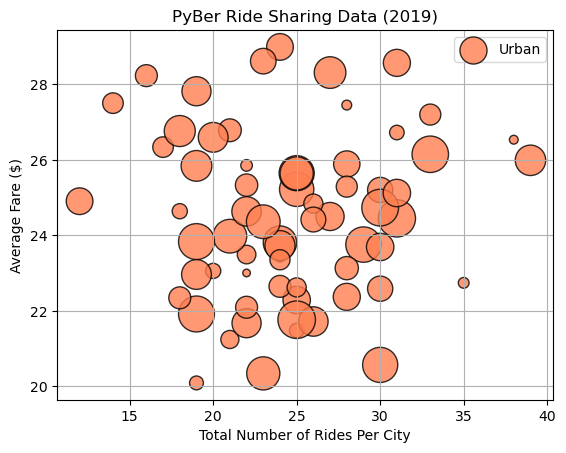

In [144]:
plt.scatter(urban_city_count,average_urban,s=10*urban_drivers, 
            linewidths=1,edgecolor="k",c="coral",
           alpha = 0.8, label = "Urban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()
plt.show()

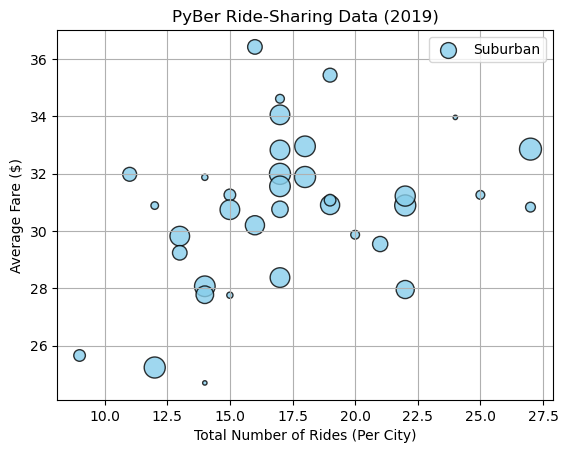

In [145]:
plt.scatter(suburban_city_count,average_suburban,
            s=10*suburban_drivers, linewidths=1,
           edgecolor = "k", c="skyblue", alpha = 0.8, 
            label = "Suburban" )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

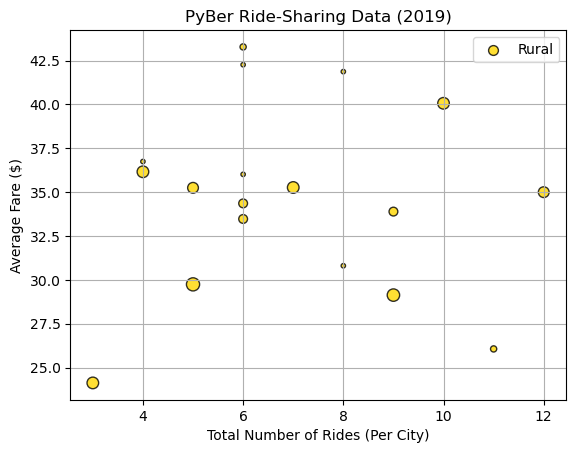

In [146]:
plt.scatter(rural_city_count, average_rural, 
            s=10*rural_drivers, label="Rural",
           edgecolor = "k", c="gold", linewidths=1, 
            alpha = 0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

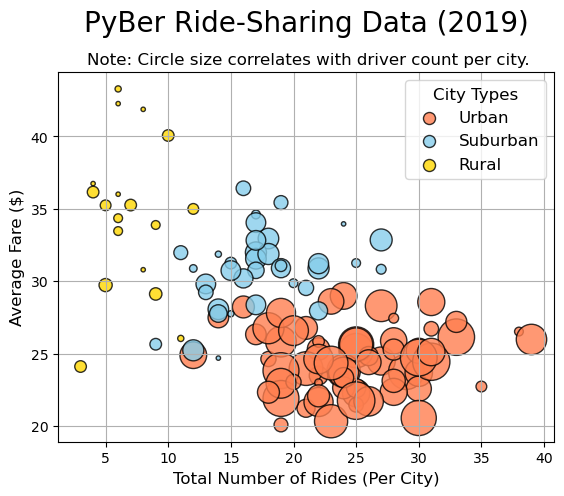

<Figure size 640x480 with 0 Axes>

In [148]:
# Add the scatter charts for each type of city.
plt.scatter(urban_city_count,average_urban,s=10*urban_drivers, 
            linewidths=1,edgecolor="k",c="coral",
           alpha = 0.8, label = "Urban")

plt.scatter(suburban_city_count,average_suburban,
            s=10*suburban_drivers, linewidths=1,
           edgecolor = "k", c="skyblue", alpha = 0.8, 
            label = "Suburban" )

plt.scatter(rural_city_count, average_rural, 
            s=10*rural_drivers, label="Rural",
           edgecolor = "k", c="gold", linewidths=1, 
            alpha = 0.8)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)\n", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(3.5, 45, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Show the plot
plt.show()
